In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline
path=""
data=pd.read_csv(path+"data.dat",sep=",",header=0)

/usr/local/Canopy_64bit/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
data["ddfH1000"]=pd.Categorical(data["ddfH1000"], ordered=False)
data["mois"]=pd.Categorical(data["mois"], ordered=False)

In [4]:
data.head()

,nebsat,lat,lon,flevap3SOL0,flir3SOL0,fllat3SOL0,huH2,nbSOL0,nhSOL0,nmSOL0,ntSOL0,ntSOL0em3,ntSOL0ep3,pMER0,tH2,tH2VGRAD,ffH1000,ddfH1000,mois,ep_opt
0,5.44,41.0,-6.0,-0.051682,-43808,-129392,97.087520,7.4375,0.0,0.0,8.0,7.8125,7.4375,1024.1106,-4.734543,5.142542,4.284757,N,1,2873.607
1,8.00,41.0,-5.5,-0.036545,-39200,-90480,97.331661,8.0000,0.0,0.0,8.0,6.2500,8.0000,1024.0506,-4.750168,5.033167,4.655296,N,1,4821.004
2,8.00,41.0,-5.0,-0.027267,-39712,-67952,96.623653,7.9375,0.0,0.0,8.0,7.3750,7.9375,1024.1706,-4.343918,4.330042,3.927262,N,1,5560.810
3,8.00,41.0,-4.5,-0.027267,-38688,-68976,97.697872,7.6875,0.0,0.0,8.0,8.0000,7.6875,1023.9506,-4.703293,4.126917,6.208558,N,1,4501.774
4,8.00,41.0,-4.0,-0.030685,-21280,-77168,96.770138,7.9375,0.0,0.0,8.0,8.0000,7.9375,1023.4606,-6.234543,3.486292,7.838200,N,1,5900.376


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564740 entries, 0 to 564739
Data columns (total 20 columns):
nebsat         564740 non-null float64
lat            564740 non-null float64
lon            564740 non-null float64
flevap3SOL0    564740 non-null float64
flir3SOL0      564740 non-null int64
fllat3SOL0     564740 non-null int64
huH2           564740 non-null float64
nbSOL0         564740 non-null float64
nhSOL0         564740 non-null float64
nmSOL0         564740 non-null float64
ntSOL0         564740 non-null float64
ntSOL0em3      564740 non-null float64
ntSOL0ep3      564740 non-null float64
pMER0          564740 non-null float64
tH2            564740 non-null float64
tH2VGRAD       564740 non-null float64
ffH1000        564740 non-null float64
ddfH1000       564740 non-null category
mois           564740 non-null category
ep_opt         564740 non-null float64
dtypes: category(2), float64(16), int64(2)
memory usage: 78.6 MB


In [6]:
data.describe(include='all')

,nebsat,lat,lon,flevap3SOL0,flir3SOL0,fllat3SOL0,huH2,nbSOL0,nhSOL0,nmSOL0,ntSOL0,ntSOL0em3,ntSOL0ep3,pMER0,tH2,tH2VGRAD,ffH1000,ddfH1000,mois,ep_opt
count,564740.000000,564740.000000,564740.000000,564740.000000,5.647400e+05,5.647400e+05,564740.000000,564740.000000,564740.000000,564740.000000,564740.000000,564740.000000,564740.000000,564740.000000,564740.000000,564740.000000,564740.000000,564740,564740.0,564740.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,12.0,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W,1.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240077,68816.0,NaN
mean,4.820920,46.250000,2.250000,-0.474936,-7.054922e+05,-1.170181e+06,73.361713,2.423189,2.944474,1.711338,4.644797,4.413124,4.478390,1017.555260,-6.796411,13.877164,8.667317,NaN,NaN,1278.916073
std,3.309194,3.172147,4.905359,0.435597,4.230117e+05,1.065897e+06,18.959685,2.941553,3.056662,2.503308,3.092112,3.109472,3.087216,8.642153,3.802129,7.575208,5.741393,NaN,NaN,1849.609539
min,0.000000,41.000000,-6.000000,-7.233536,-2.056832e+06,-1.772608e+07,7.258479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,966.248100,-14.895390,-24.211680,0.009301,NaN,NaN,0.000000
25%,0.800000,43.500000,-2.000000,-0.698425,-1.041953e+06,-1.717012e+06,61.178563,0.000000,0.000000,0.000000,1.500000,1.187500,1.312500,1012.591900,-9.593079,9.130487,4.325734,NaN,NaN,40.968058
50%,5.920000,46.250000,2.250000,-0.340012,-7.548240e+05,-8.423680e+05,77.096078,0.875000,1.750000,0.062500,5.375000,4.812500,4.937500,1017.729400,-7.312012,13.938490,7.461597,NaN,NaN,535.566500
75%,8.000000,49.000000,6.500000,-0.147980,-3.342880e+05,-3.714240e+05,88.911598,4.562500,5.937500,2.812500,7.875000,7.750000,7.750000,1023.106300,-4.551926,18.957670,11.772847,NaN,NaN,1685.488500


In [7]:
data.mean()

nebsat         4.820920e+00
lat            4.625000e+01
lon            2.250000e+00
flevap3SOL0   -4.749357e-01
flir3SOL0     -7.054922e+05
fllat3SOL0    -1.170181e+06
huH2           7.336171e+01
nbSOL0         2.423189e+00
nhSOL0         2.944474e+00
nmSOL0         1.711338e+00
ntSOL0         4.644797e+00
ntSOL0em3      4.413124e+00
ntSOL0ep3      4.478390e+00
pMER0          1.017555e+03
tH2           -6.796411e+00
tH2VGRAD       1.387716e+01
ffH1000        8.667317e+00
ep_opt         1.278916e+03
dtype: float64

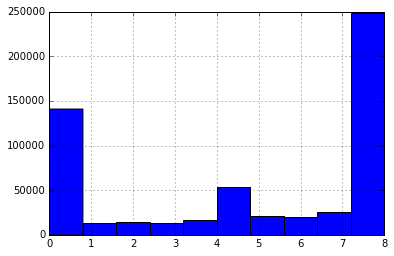

In [8]:
data["nebsat"].hist()
plt.show()

In [9]:
def classes(x):
    y=x
    y[(y<=10) & (y>0)]=2
    y[(y>10) & (y<=25)]=3
    y[(y>25) & (y<=50)]=4
    y[(y>50) & (y<=75)]=5
    y[y>75]=6
    y[y==0]=1
    return y

In [10]:
data["nebsat"]=data["nebsat"].map(lambda x: 100*x/8)
data["ntSOL0"]=data["ntSOL0"].map(lambda x: 100*x/8)


In [11]:
neb=data["nebsat"][ : :]
nebC=classes(neb)
data["nebsatC"]=nebC
#del data["nebsat"]


In [12]:
data.head()

,nebsat,lat,lon,flevap3SOL0,flir3SOL0,fllat3SOL0,huH2,nbSOL0,nhSOL0,nmSOL0,...,ntSOL0em3,ntSOL0ep3,pMER0,tH2,tH2VGRAD,ffH1000,ddfH1000,mois,ep_opt,nebsatC
0,5.0,41.0,-6.0,-0.051682,-43808,-129392,97.087520,7.4375,0.0,0.0,...,7.8125,7.4375,1024.1106,-4.734543,5.142542,4.284757,N,1,2873.607,5.0
1,6.0,41.0,-5.5,-0.036545,-39200,-90480,97.331661,8.0000,0.0,0.0,...,6.2500,8.0000,1024.0506,-4.750168,5.033167,4.655296,N,1,4821.004,6.0
2,6.0,41.0,-5.0,-0.027267,-39712,-67952,96.623653,7.9375,0.0,0.0,...,7.3750,7.9375,1024.1706,-4.343918,4.330042,3.927262,N,1,5560.810,6.0
3,6.0,41.0,-4.5,-0.027267,-38688,-68976,97.697872,7.6875,0.0,0.0,...,8.0000,7.6875,1023.9506,-4.703293,4.126917,6.208558,N,1,4501.774,6.0
4,6.0,41.0,-4.0,-0.030685,-21280,-77168,96.770138,7.9375,0.0,0.0,...,8.0000,7.9375,1023.4606,-6.234543,3.486292,7.838200,N,1,5900.376,6.0


In [13]:
nebsat=data.iloc[:,20]
data.drop(data.columns[[0]], axis=1,inplace=True)
#del data["fllat3SOL0"]
#nebsatDum=pd.get_dummies(data[["mois","ddfH1000"]])
del data["ddfH1000"]
del data["mois"]

In [14]:
nebsat

0         5.0
1         6.0
2         6.0
3         6.0
4         6.0
5         6.0
6         6.0
7         6.0
8         6.0
9         6.0
10        6.0
11        6.0
12        6.0
13        5.0
14        1.0
15        1.0
16        1.0
17        4.0
18        5.0
19        1.0
20        6.0
21        5.0
22        3.0
23        6.0
24        6.0
25        6.0
26        6.0
27        5.0
28        3.0
29        6.0
         ... 
564710    4.0
564711    4.0
564712    4.0
564713    5.0
564714    5.0
564715    2.0
564716    6.0
564717    5.0
564718    5.0
564719    6.0
564720    6.0
564721    5.0
564722    6.0
564723    5.0
564724    5.0
564725    4.0
564726    1.0
564727    6.0
564728    6.0
564729    6.0
564730    6.0
564731    6.0
564732    6.0
564733    6.0
564734    6.0
564735    6.0
564736    6.0
564737    6.0
564738    6.0
564739    5.0
Name: nebsatC, dtype: float64

In [15]:
from sklearn.cross_validation import KFold
n=len(data.index)
kf=KFold(n, n_folds=2)
print kf

sklearn.cross_validation.KFold(n=564740, n_folds=2, shuffle=False, random_state=None)


/home/pruilh/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection i

B=3
paramGrid=[{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,)])}]

for i in range (B):
    X_train,X_test,Y_train,Y_test=train_test_split(data,nebsat,test_size=1000)
    nnet=gridSearchCV(MLPClassifier(max_iter=500),paramGrid,cv=10,n_jobs=-1)
    nnetOpt=nnet.best_estimator_
    nnetFit=nnetOpt.fit(X_train,Y_train)
    array_erreur[i]=1-nnetOpt.score(X_test,Y_test)
    

NameError: name 'gridSearchCV' is not defined

In [71]:
for train_index,test_index in kf:
    X_train,X_test = data.iloc[train_index],data.iloc[test_index]
    y_train, y_test = nebsat.iloc[train_index], nebsat.iloc[test_index]

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
#from sklearn.model_selection import GridSearchCV


In [73]:

nnet=MLPClassifier(max_iter=200,hidden_layer_sizes=(2,))
nnetOpt=nnet.fit(X_train,y_train)


In [75]:
1-nnetOpt.score(X_test,y_test)

0.0

In [76]:
# prévision de l'échantillon test
y_chap = nnetOpt.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,y_test)
print(table)

nebsatC     2.0
row_0          
2.0      282370
